# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("data\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
print(df.columns)

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [9]:
df["route"].unique() # Flight Hour is clean since all less than 24

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

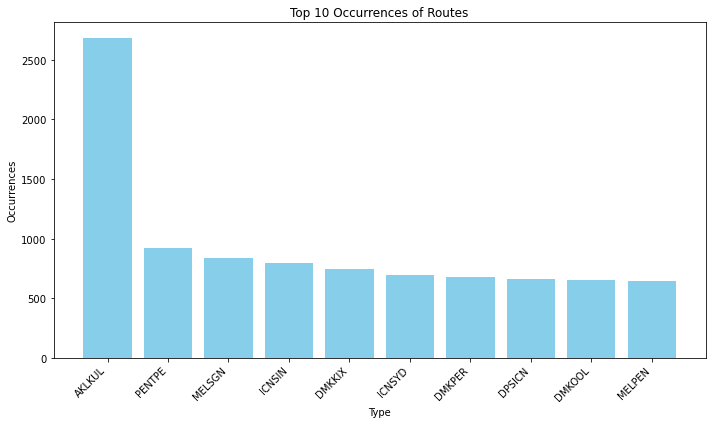

In [10]:
counts = df['route'].value_counts()

top_10counts = counts.nlargest(10)

plt.figure(figsize=(10,6))
plt.bar(top_10counts.index, top_10counts.values, color='skyblue', align='center')
plt.title('Top 10 Occurrences of Routes')
plt.xlabel('Type')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()

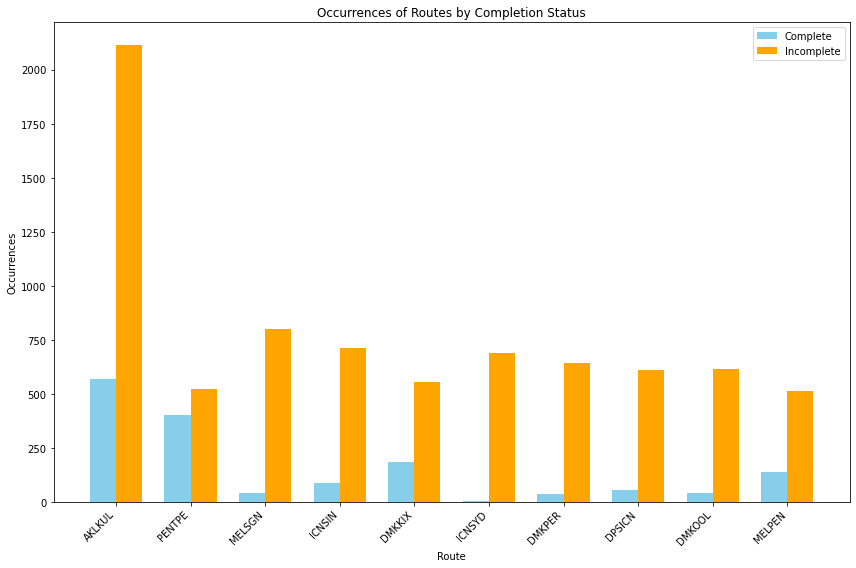

In [11]:
# Get value counts of routes
counts = df['route'].value_counts()

# Get the top 10 routes
top_10_counts = counts.nlargest(10)

# Create a DataFrame to store counts of booking_complete for each route
route_data = []
for route in top_10_counts.index:
    completed_count = df[(df['route'] == route) & (df['booking_complete'] == 1)].shape[0]
    incomplete_count = df[(df['route'] == route) & (df['booking_complete'] == 0)].shape[0]
    route_data.append({'Route': route, 'Complete': completed_count, 'Incomplete': incomplete_count})

route_df = pd.DataFrame(route_data)

# Plotting
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = range(len(top_10_counts))

plt.bar(index, route_df['Complete'], bar_width, label='Complete', color='skyblue')
plt.bar([i + bar_width for i in index], route_df['Incomplete'], bar_width, label='Incomplete', color='orange')

plt.xlabel('Route')
plt.ylabel('Occurrences')
plt.title('Occurrences of Routes by Completion Status')
plt.xticks([i + bar_width/2 for i in index], top_10_counts.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


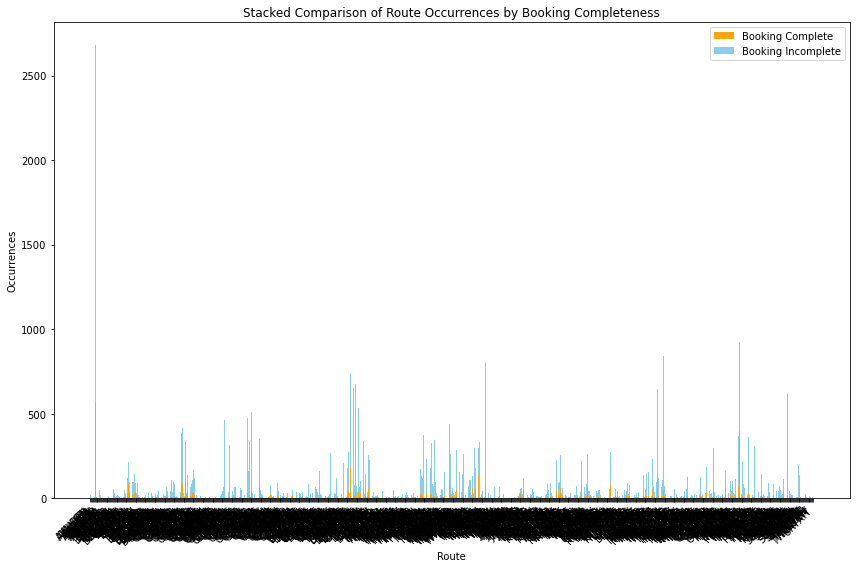

In [12]:
booking_counts = df.groupby(['route', 'booking_complete']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
plt.bar(booking_counts.index, booking_counts[1], color='orange', label='Booking Complete')
plt.bar(booking_counts.index, booking_counts[0], bottom=booking_counts[1], color='skyblue', label='Booking Incomplete')

# Adding labels, titles, and legend
plt.xlabel('Route')
plt.ylabel('Occurrences')
plt.title('Stacked Comparison of Route Occurrences by Booking Completeness')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


The most looked at route have horrible completion rate, while other routes have 

In [13]:
df["booking_origin"].unique() # Flight Hour is clean since all less than 24

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

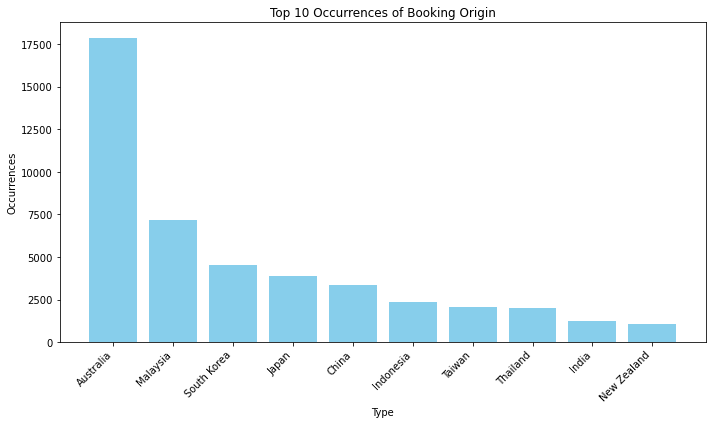

In [14]:
bo_counts = df['booking_origin'].value_counts()

top_10_bo_counts = bo_counts.nlargest(10)

plt.figure(figsize=(10,6))
plt.bar(top_10_bo_counts.index, top_10_bo_counts.values, color='skyblue', align='center')
plt.title('Top 10 Occurrences of Booking Origin')
plt.xlabel('Type')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()

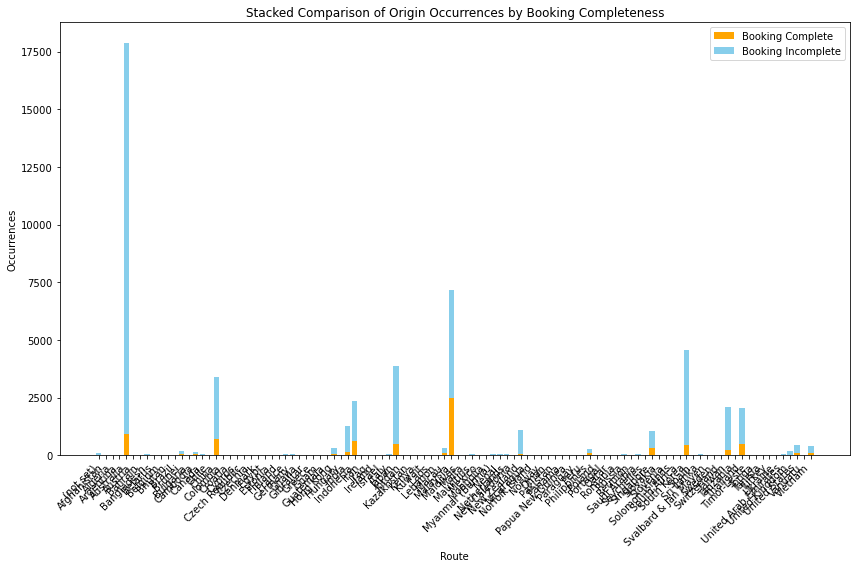

In [15]:
booking_counts = df.groupby(['booking_origin', 'booking_complete']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
plt.bar(booking_counts.index, booking_counts[1], color='orange', label='Booking Complete')
plt.bar(booking_counts.index, booking_counts[0], bottom=booking_counts[1], color='skyblue', label='Booking Incomplete')

# Adding labels, titles, and legend
plt.xlabel('Route')
plt.ylabel('Occurrences')
plt.title('Stacked Comparison of Origin Occurrences by Booking Completeness')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
mapping = {
    "Internet": 1,
    "Mobile": 2,
}

df["sales_channel"] = df["sales_channel"].map(mapping)

In [17]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [18]:
mapping = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay": 3,
}

df["trip_type"] = df["trip_type"].map(mapping)

In [19]:
df['booking_complete'].unique() 

array([0, 1], dtype=int64)

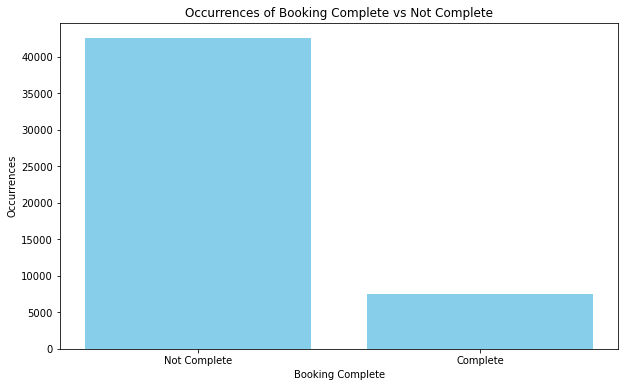

In [20]:
booking_complete_counts = df["booking_complete"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(booking_complete_counts.index, booking_complete_counts.values, color='skyblue', align='center')
plt.title('Occurrences of Booking Complete vs Not Complete')
plt.xlabel('Booking Complete')
plt.ylabel('Occurrences')
plt.xticks(booking_complete_counts.index, ['Not Complete', 'Complete'])  # Set x-axis labels
plt.show()

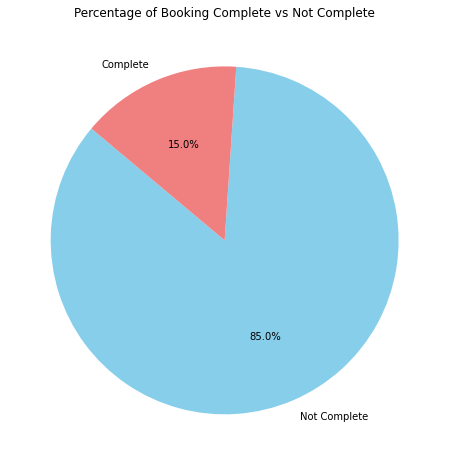

In [21]:
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(booking_complete_counts, labels=['Not Complete', 'Complete'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Percentage of Booking Complete vs Not Complete')
plt.savefig("img/Pct.png", format="png")
plt.show()

Note: There is already bias in this data because only 15% are completed. Therefore, 85% accurate is the benchmark of this data because any model could predict them all to be not completed and recieve an accuracy of about 85%. So, I will use methods limit this bias.

## Machine Learning
### Random Forest

To limit the bias in this model I used the technique of apply class weights to the booking complete variable to account for the bias. Therefore, when use class weights, it's important to interpret the model's performance in the context of the class imbalance and the chosen weights. A high accuracy may not necessarily mean a good model if it's primarily due to the dominance of the majority class. I have to look at other metrics like precision, recall, and F1-score to assess the model's performance holistically. For clairification, a good F1-score is 0.7 and up.

In [22]:
# removing varibles with to many categorical varibales
df = df.drop(columns=["route", "booking_origin"])

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=["booking_complete"])  # Features
y = df["booking_complete"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define class weights
#class_weight = {0: 0.15, 1: 0.85}  # Adjust the weights as per your class distribution

# Initializing and fitting the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap = True,  class_weight= "balanced", max_leaf_nodes=8)
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing out the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6509
Precision: 0.2351856728996576
Recall: 0.6033783783783784
F1 Score: 0.33844987682395294


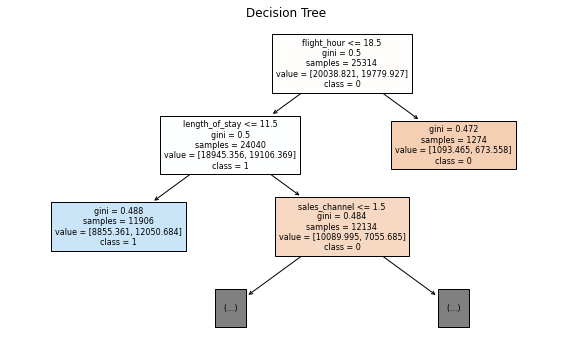

In [24]:
from sklearn.tree import plot_tree

# Plotting the first tree in the forest
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=["0", "1"], filled=True,
          fontsize=8, max_depth=2)  # Adjust the font size and max depth as needed
plt.title("Decision Tree")  
plt.show()


In [25]:
# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=["booking_complete"])  # Features
y = df["booking_complete"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initializing and fitting the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=6, weights='uniform')  # You can adjust parameters like n_neighbors
knn_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing out the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.849
Precision: 0.3404255319148936
Recall: 0.021621621621621623
F1 Score: 0.04066073697585769


## Undersampling
Due to too much bias in the data, I am now going to undersample the data meaning I am randomly remove samples from the majority class to balance the class distribution.

Advantages:
- It reduces the computational complexity and training time by reducing the size of the majority class.
- It may reduce overfitting by focusing the model on the most relevant samples.

Disadvantages:
- It may lead to loss of information because it discards potentially useful data from the majority class.
- It may not represent the entire distribution of the majority class, leading to biased models.

In [27]:
# pip install imbalanced-learn

In [28]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target variable (y)
X = df.drop(columns=["booking_complete"])
y = df["booking_complete"]

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample the majority class
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the undersampled data to a DataFrame
undersampled_df = pd.DataFrame(X_resampled, columns=X.columns)
undersampled_df["booking_complete"] = y_resampled

# Now undersampled_df contains the undersampled data


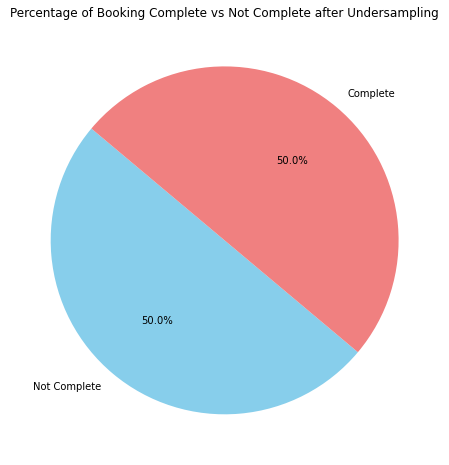

In [29]:
booking_complete_counts = undersampled_df["booking_complete"].value_counts()
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(booking_complete_counts, labels=['Not Complete', 'Complete'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Percentage of Booking Complete vs Not Complete after Undersampling')
plt.savefig("img/UndSampPct.png", format="png")
plt.show()

### Random Forest

In [30]:
# Splitting the data into features (X) and target variable (y)
X = undersampled_df.drop(columns=["booking_complete"])  # Features
y = undersampled_df["booking_complete"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing out the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6310160427807486
Precision: 0.6274373259052924
Recall: 0.6129251700680272
F1 Score: 0.6200963523743979


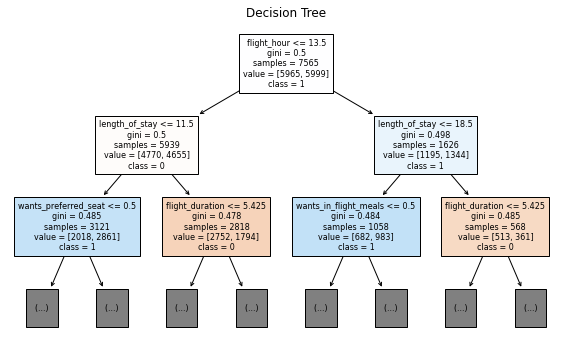

In [31]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=["0", "1"], filled=True,
          fontsize=8, max_depth=2)  # Adjust the font size and max depth as needed
plt.title("Decision Tree")  
plt.savefig("img/Tree.png", format="png")
plt.show()

### KNN

In [32]:
# Splitting the data into features (X) and target variable (y)
X = undersampled_df.drop(columns=["booking_complete"])  # Features
y = undersampled_df["booking_complete"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initializing and fitting the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust parameters like n_neighbors
knn_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing out the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5411096256684492
Precision: 0.5325721961047682
Recall: 0.5394557823129251
F1 Score: 0.5359918891517403
